## STAT 207 Lab 4: Sampling Distributions, Probability, and Data Cleaning - [25 total points] - Solutions

Due: Wednesday, February 24, 11:59pm CST

## <u>Case Study</u>: Household Income and Education Level in U.S. Counties
In this lab we will explore the statistical concepts that we've learned this week while also examining the **median household income (median_hh_income)**, the **median education level (median_edu)**, and the relationship between these variables in a **population** of 3142 U.S. counties.

## 1. <u>Preliminaries</u>
### Imports

In [1]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style

### 1a. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

In [5]:
df = pd.read_csv('county.csv')
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


### 1b. [0.5pt] Display the shape of the dataframe.

In [6]:
df.shape

(3142, 15)

### 1c. [4 pt] Data cleaning and data type checking
We plan to analyze the "median_hh_income" variable as well as the "median_edu" variable in this assignment. In order to ensure that our subsequent functions work appropriately on these variables, you should do the following.
1. Make sure you have identified any values that have been encoded in the csv to represent a missing value. 
2. Make sure that the values in your "median_hh_income" variable are interpreted as numerical values. If not, fix this using the methods we discussed in class.
3. Delete any rows in your dataframe that have missing values. Remember, some "missing values", in the way that they're currently encoded are not always detectable by Python.

#### Warning: If you don't do this step appropriately, you may have issues when you run other functions.

#### Hint: There are some missing values in this csv. You may need to get creative (beyond what we taught you in class, but still using functions you know) to figure out what they are.


In [27]:
for i in df['median_hh_income'].unique():
    print(i)  

55317.0
52562.0
33368.0
43404.0
47412.0
29655.0
36326.0
43686.0
37342.0
40041.0
43501.0
32122.0
33827.0
37287.0
37396.0
49821.0
45477.0
30434.0
34792.0
39467.0
38937.0
40997.0
44711.0
30065.0
38842.0
54981.0
35026.0
42064.0
36541.0
39501.0
39293.0
20954.0
34679.0
45569.0
42803.0
39281.0
49321.0
36016.0
44888.0
43779.0
47564.0
52831.0
29785.0
32308.0
61318.0
32255.0
35719.0
41104.0
45802.0
26036.0
46545.0
47529.0
22973.0
36220.0
35684.0
39485.0
38988.0
53483.0
74063.0
21663.0
39219.0
42181.0
50513.0
38872.0
42185.0
27012.0
35362.0
66607.0
85192.0
82271.0
53853.0
79500.0
83295.0
58708.0
76250.0
70640.0
57900.0
90749.0
65279.0
67321.0
74167.0
45208.0
74887.0
53821.0
77266.0
61533.0
63490.0
52114.0
70765.0
70673.0
63866.0
86019.0
nan
56094.0
64583.0
37819.0
32360.0
47847.0
53523.0
41179.0
48173.0
56298.0
36479.0
58580.0
41567.0
38798.0
48676.0
52628.0
39630.0
48259.0
43253.0
38532.0
36407.0
40072.0
61271.0
40727.0
36310.0
37225.0
39686.0
32412.0
37144.0
32219.0
42312.0
44840.0
37072.0
3963

106870.0
114795.0
38760.0
57258.0
31311.0
52021.0
43009.0
40712.0
37309.0
41971.0
77551.0
79131.0
33545.0
51082.0
47137.0
26971.0
33939.0
88328.0
48727.0
36082.0
42356.0
41483.0
53990.0
46435.0
68089.0
70500.0
42112.0
54606.0
49330.0
48131.0
47483.0
63001.0
54975.0
48002.0
67832.0
46250.0
49804.0
55805.0
51399.0
52382.0
45483.0
61516.0
83571.0
53163.0
51258.0
46387.0
53087.0
42598.0
39895.0
60271.0
59263.0
53606.0
78020.0
52159.0
47272.0
66113.0
52630.0
56419.0
41574.0
47470.0
37516.0
59480.0
37955.0
41266.0
48835.0
37816.0
36279.0
34242.0
44437.0
37175.0
40093.0
40483.0
43634.0
42573.0
41731.0
72526.0
46859.0
39793.0
37075.0
37859.0
25595.0
48158.0
42473.0
38977.0
37763.0
40749.0
31227.0
49624.0
36684.0
46346.0
39037.0
45777.0
39554.0
45152.0
37111.0
46673.0
59113.0
40094.0
41497.0
37931.0
35218.0
45916.0
43294.0
40902.0
39434.0
38905.0
33390.0
40694.0
38936.0
45537.0
37644.0
44003.0
41505.0
49257.0
50110.0
56775.0
54753.0
45891.0
70662.0
55240.0
49131.0
63293.0
47331.0
67631.0
56038.

In [25]:
missing_values = ["data unavailable"]
df = pd.read_csv('county.csv', na_values = missing_values)
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [28]:
df.isna().sum()

name                   0
state                  0
pop2000                3
pop2010                0
pop2017                3
pop_change             3
poverty                2
homeownership          0
multi_unit             0
unemployment_rate      3
metro                  3
median_edu             2
per_capita_income      3
median_hh_income       2
smoking_ban          580
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [32]:
df.shape

(2559, 15)

### 1d. [0.5 pt] How many rows with missing values did our original dataframe have?

3142 - 2559 = 583

Before removing missing values from our dataframe, there were 583 rows with missing values.

## 2. <u>Population Analysis</u>

We will consider our dataframe (with any missing values dropped) as the population of US counties.

### 2.a. [0.5 pt] Calculate the population mean of the median household income.

In [33]:
df['median_hh_income'].mean()

49050.69284876905

### 2.b. [0.5 pt] Calculate the population standard deviation of the median household income.

In [34]:
df['median_hh_income'].std()

12943.834277885424

### 2.c. [1 pt] Plot the population distribution and describe the shape of the distribution (skew and modality).

Make sure you accurately label the x-axis!

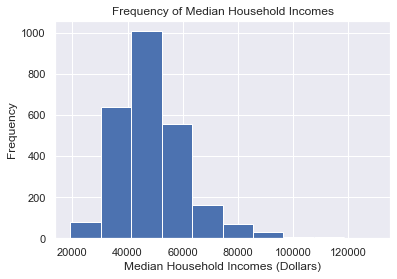

In [50]:
df['median_hh_income'].hist()
plt.xlabel("Median Household Incomes (Dollars)")
plt.ylabel("Frequency")
plt.title('Frequency of Median Household Incomes')
plt.show()

The shape of this distribution is skewed slightly to the right, and it is unimodal with a mean value at around $49,000.

## 3. <u> Sample Analysis</u>

### 3.a. [0.5 pt] Collect a random sample from this population with replacement of size 200 using a random_state of 100. Display the first 5 rows.

In [44]:
sample = df.sample(200, random_state = 100)
sample.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
2177,Major County,Oklahoma,7545.0,7527,7693.0,-0.09,13.1,81.0,4.2,3.22,no,hs_diploma,28249.60,52056.0,none
1302,Roscommon County,Michigan,25469.0,24449,23895.0,-0.45,19.8,84.6,3.6,8.91,no,hs_diploma,21877.00,37834.0,none
1749,Douglas County,Nevada,41259.0,46997,48309.0,2.85,9.8,76.2,11.4,4.80,no,some_college,35501.29,61176.0,partial
2004,Emmons County,North Dakota,4331.0,3550,3301.0,-5.20,11.9,84.1,6.9,3.99,no,hs_diploma,30708.92,46581.0,partial
3010,Jefferson County,West Virginia,42190.0,53498,56338.0,2.77,9.9,77.8,10.4,3.15,yes,some_college,33754.62,72526.0,none


### 3.b. [1 pt] Calculate the mean and standard deviation median household income of this sample.

In [46]:
sample['median_hh_income'].mean()

50095.855

In [47]:
sample['median_hh_income'].std()

13094.484253812432

### 3.c. [1 pt] Plot the sample distribution median household income and describe the shape of the distribution (skew and modality).

Make sure you accurately label the x-axis!

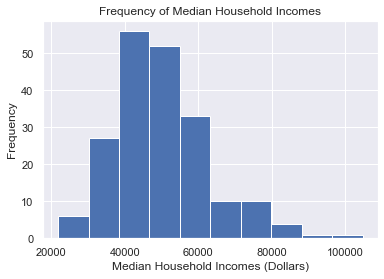

In [49]:
sample['median_hh_income'].hist()
plt.xlabel("Median Household Incomes (Dollars)")
plt.ylabel("Frequency")
plt.title('Frequency of Median Household Incomes')
plt.show()

The shape of this distribution is also slightly skewed to the right, and it is unimodal.

### 3.d. [2 pt] Create a sampling distribution of sample means (using the median household income variable) with the following specifications:
* the samples are of size 200
* the distribution is comprised of 5000 sample means.

In [51]:
x = 'median_hh_income'
SampleMeans = []
n_iterations = 5000
for i in range(n_iterations):
    random_sample = df[x].sample(200, replace = True)
    mean = random_sample.mean()
    SampleMeans.append(mean)

In [55]:
sample_means_df = pd.DataFrame({x: SampleMeans})
sample_means_df.head()

,median_hh_income
0,48688.890
1,48730.490
2,49298.770
3,47826.955
4,49707.595


### 3.e. [1 pt] Calculate the mean and standard deviation of this sampling distribution.

In [56]:
sample_means_df.mean()

median_hh_income    49046.864593
dtype: float64

In [57]:
sample_means_df.std()

median_hh_income    923.968574
dtype: float64

### 3.f. [1 pt] Plot the sampling distribution and describe the shape (modality and skew).

#### Make sure you accurately label the x-axis.

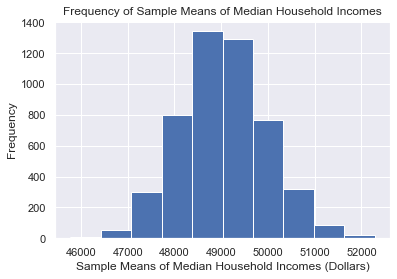

In [58]:
sample_means_df.hist()
plt.xlabel("Sample Means of Median Household Incomes (Dollars)")
plt.ylabel("Frequency")
plt.title('Frequency of Sample Means of Median Household Incomes')
plt.show()

The shape of the distribution is approximately normal, and it is also unimodal.

## 4.  <u>Comparing Population and Sampling Distributions</u>

### 4.a. [2 pt] If you randomly sampled a county from the population of counties (post-data cleaning) what would be the probability that this county has a median household income that was at least $52,000?

In [62]:
df_52000 = df[df['median_hh_income'] >= 52000]

In [63]:
df_52000.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
25,Elmore County,Alabama,65874.0,79303,81677.0,1.39,13.5,77.6,7.0,3.64,yes,some_college,27266.03,54981.0,partial
41,Limestone County,Alabama,65676.0,82782,94402.0,6.19,14.8,77.1,9.4,3.98,yes,some_college,25685.40,52831.0,none
57,St. Clair County,Alabama,64742.0,83593,88199.0,2.52,13.7,82.2,5.5,3.97,yes,hs_diploma,24731.80,53483.0,none


In [64]:
print(df_52000.shape[0]/df.shape[0])

0.3395857756936303


### 4.b. [1 pt] If you randomly sampled a sample mean from the sampling distribution what would be the probability that sample mean was at least $52,000?

In [66]:
print(df_52000.shape[0]/sample_means_df.shape[0])

0.1738


## 5. <u>Probability</u>: 
The work we do here will help develop intuition for topics we will cover in next week's lectures. (You have everything you need to answer these questions though.)

### 5.a. [1 pt] Suppose we were to collect a random sample <u>with replacement</u> of six counties (from our post-data cleaning dataframe). What is the probability that the first and fifth sampled counties have a median income of at least $52,000 and the other four do not?

P (first and fifth sampled counties have median_hh_income >= 52000, and others do not) 

= P(median_hh_income >= 52000) * P(1 - (median_hh_income >= 52000)) * P(1 - (median_hh_income >= 52000)) * P(1 - (median_hh_income >= 52000)) *  P(median_hh_income >= 52000) * P(1 - (median_hh_income >= 52000)) 

= (P(median_hh_income >= 52000))^2 * (P(1 - (median_hh_income >= 52000)))^4

= (0.3395857756936303)^2 * (1 - 0.3395857756936303)^4

= 0.0219

### 5.b. [1 pt] What is the probability that the second and fourth sampled counties have a median income of at least $52,000 and the other four do not?

This problem will be approached the same way as the problem above. The only difference is the order in which the probabilities will be multiplied, which has no affect on the final answer.

P (first and fifth sampled counties have median_hh_income >= 52000, and others do not) 

= P(1 - (median_hh_income >= 52000)) * P(median_hh_income >= 52000) * P(1 - (median_hh_income >= 52000)) *  P(median_hh_income >= 52000) * P(1 - (median_hh_income >= 52000)) * P(1 - (median_hh_income >= 52000)) 

= (P(median_hh_income >= 52000))^2 * (P(1 - (median_hh_income >= 52000)))^4

= (0.3395857756936303)^2 * (1 - 0.3395857756936303)^4

= 0.0219

### 5.c. [1 pt] Define the following events as follows.
* <u>event 1</u>: the sample that we collect has the second and fourth sampled counties have a median income of at least \$52,000 and the other four do not
* <u>event 2</u>: the SAME sample that we collect has the first and fifth sampled counties have a median income of at least $52,000 and the other four do not.

### Are event 1 and event 2 mutually exclusive? Why or why not?

P(Event 1) = The probability that  the sample that we collect has the second and fourth sampled counties have a median income of at least $52,000 and the other four do not 
P(Event 1) = 0.0219

P(Event 2) = The probability that  the sample that we collect has the first and fifth sampled counties have a median income of at least $52,000 and the other four do not 
P(Event 2) = 0.0219

P(Event 1 and Event 2) = The probability of both events happening at the same time.
P(Event 1 and Event 2) = 0 
It is impossible for these two events to happen at the same time because in both events, there are a maximum of 2 occurances of a family having a median income of at least $52,000, and in order for both events to happen at the same time, the first, second, fourth, and fifth samples of counties must have a minimum median family income of $52,000. Therefore, it is impossible for these events to happen at the same time. Hence, event 1 and event 2 are mutually exclusive. 



### 5.d. [2 pt] How many possible ways(ie. orderings) can have exactly two of our six sampled counties have a median houeshold income of at least $52,000?

Hint: Event 1 and event 2 above are two ways (orderings) in which this can happen, there are several other ways.

Hint: How many possible ways can we choose two out of the six available positions within the sample (ie. position 1=county that was selected first, position 2=county that was selected second,...) to have a median household income over $52,000.

The best way to figure this out is to evaluate the expression (6 choose 2), because there are 6 counties total, and we are looking for 2 specific values to occur out of the total. This expression will yield the total of ways to order these 2 events happening out of the 6 possible spots.

(6 C 2) = 6!/(2!(6-2)!) = 15

There are 15 possible orderings for there to be exactly two of our six sampled counties to have a median household income of at least $52,000.

### 5.e. [1 pt] What is the probability that a randomly selected county from the population (post data-cleaning) will have a median educational attainment of 'bachelors'?

In [74]:
for i in df['median_edu'].unique():
    print(i) 

df_bachelors = df[df['median_edu'] == 'bachelors']
df_bachelors.shape

some_college
hs_diploma
bachelors
below_hs


(37, 15)

In [71]:
print(df_bachelors.shape[0]/df.shape[0])

0.014458772958186792


### Tutorial: Filtering on Multiple Row Conditions in a Dataframe.

* We can use the "&" operator to write (condition 1) & (condition 2), in which condition 1 AND condition 2 must be met.
* We can use the "|" operator to write (condition 1) | (condition 2), in which condition 1 OR condition 2 must be met.

In [ ]:
import pandas as pd
smalldf=pd.DataFrame({'year':['fresh','soph', 'soph', 'junior'], 'major': ['stats','cs','underwater_basket_weaving','cs']})
smalldf

In [ ]:
smalldf[(smalldf['year']=='soph') & (smalldf['major']=='cs')]

In [ ]:
smalldf[(smalldf['year']=='soph') | (smalldf['major']=='cs')]

### 5.f. [1 pt] What is the probability that if we randomly select a county from our population (post-data cleaning) that the county has a median household income of at least $52,000 and a median education attaintment of a bachelors degree?

In [82]:
df_52000_and_bachelors = df[(df['median_hh_income'] >= 52000) & (df['median_edu'] == 'bachelors')]

print(df_52000_and_bachelors.shape[0]/df.shape[0])


0.014458772958186792


### 5.g. [1 pt] Is the event of randomly selecting a county that has a median household income of at least $52,000 independent of the event of randomly selecting a county that has a median education attainment of a bachelor's degree? Why or why not?

We can determine the dependancy of two events by testing the following:
    
Two events are independent if: 
𝑃(𝐴 𝑎𝑛𝑑 𝐵) = 𝑃(𝐴)𝑃(𝐵)
𝑃(𝐴|𝐵) = 𝑃(𝐴)
𝑃(𝐵|𝐴) = 𝑃(𝐵)

So,
First, we know the probability of the two events occuring:
P((Median Household Income >= 52000)) = 0.3395857756936303
P((Median educational attainment == bachelors)) = 0.014458772958186792


P((Median Household Income >= 52000) and (Median educational attainment == bachelors)) = 0.014458772958186792
P((Median Household Income >= 52000)) * P((Median educational attainment == bachelors)) = ~ .0049

Since P((Median Household Income >= 52000) and (Median educational attainment == bachelors))
!= 
P((Median Household Income >= 52000)) * P((Median educational attainment == bachelors))....
These two events are not independent of each other.